## Name- Shreya Sood

# Deep Learning Model for forecasting customer churn

Problem Statement: 
* This task involves addressing the issue of predicting customer churn.
* The objective is to comprehend the reasons why customers are discontinuing their association with a business. 
* The aim is to construct a deep learning model for accurately forecasting customer churn.

#### Consider Churn.csv file and do the following

1. Drop only 'customerID' feature. Having 'Churn' as dependent variable, perform better EDA to gain the insights about the problem and write description about each step.

2. Do not ignore the steps of CRISP-DM model before reaching to the prediction stage.

3. Use deep neural networks for prediction and write description about configuration of the network. Reconfigure your network twice and show the corresponding output.

4. Check for the overfitting and use regularization methods in sequence and display the output of each method. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load the data

In [2]:
df = pd.read_csv("Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df=df.drop(['customerID'],axis=1)
df.shape

(7043, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df['SeniorCitizen'] = df.SeniorCitizen.astype('category')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   object  
 6   MultipleLines     7043 non-null   object  
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   object  
 9   OnlineBackup      7043 non-null   object  
 10  DeviceProtection  7043 non-null   object  
 11  TechSupport       7043 non-null   object  
 12  StreamingTV       7043 non-null   object  
 13  StreamingMovies   7043 non-null   object  
 14  Contract          7043 non-null   object  
 15  PaperlessBilling  7043 non-null   object  
 16  PaymentMethod     7043 n

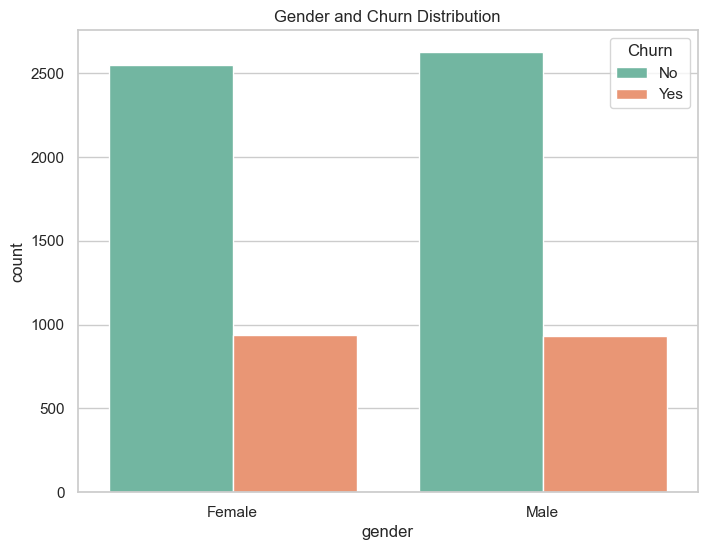

In [9]:
sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, hue='Churn')
plt.title('Gender and Churn Distribution')
plt.show()

### This is a graph showing us how many males and females have churned out and how many have not. Both males and females who have churned out are same in number.

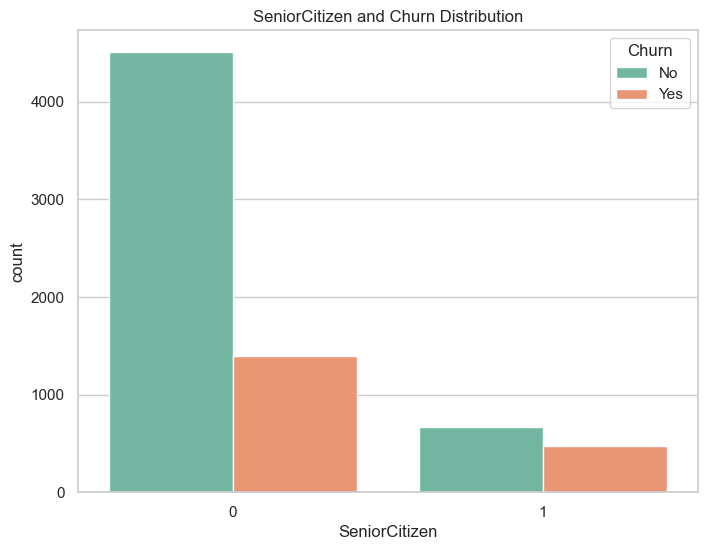

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
plt.title('SeniorCitizen and Churn Distribution')
plt.show()

### This is a graph showing us who all are senior citizens and who all are not. Also, out of this data what is the count of people who have churned out. Data show us that there are large number of senior citizens who have churned out as compare to the people who are not senior citizens.

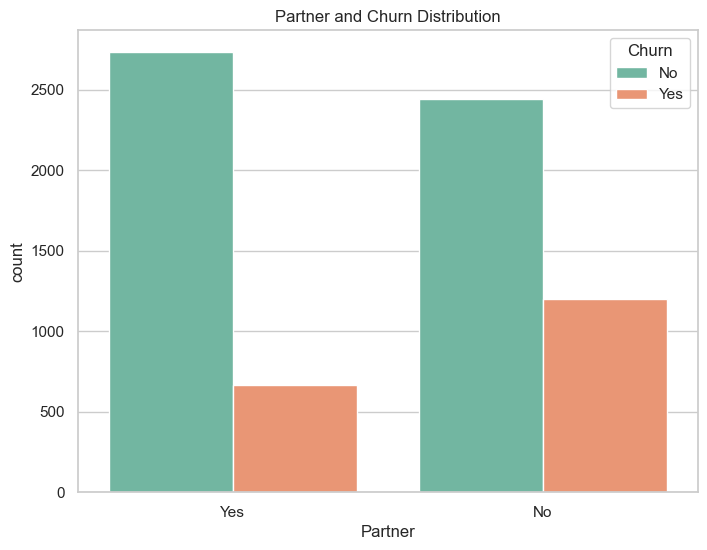

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', data=df, hue='Churn')
plt.title('Partner and Churn Distribution')
plt.show()

### This is a graph showing us if partners are churning out or not. And as we can see, there is no link between being partner and churning out. Churn count is higher in the case where there the value of partner is No

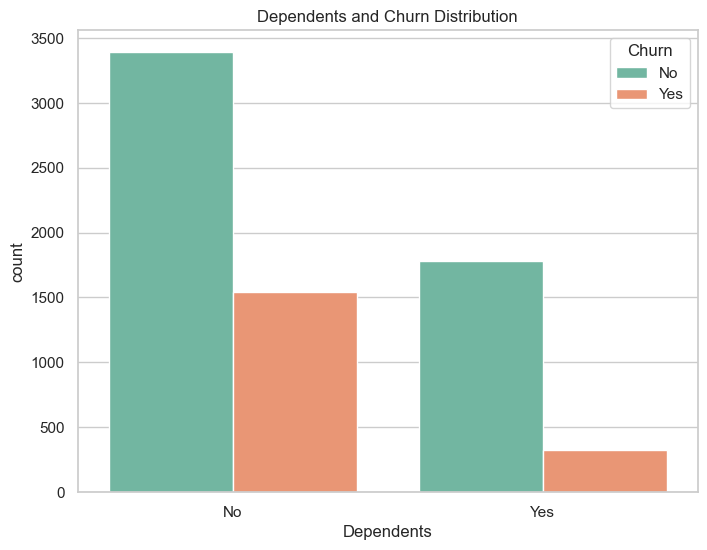

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', data=df, hue='Churn')
plt.title('Dependents and Churn Distribution')
plt.show()

### This graph shows the relationship between Dependents and Churn. As we can see, if the person is not dependent the count of churn is higher as compare to the person who is dependent.

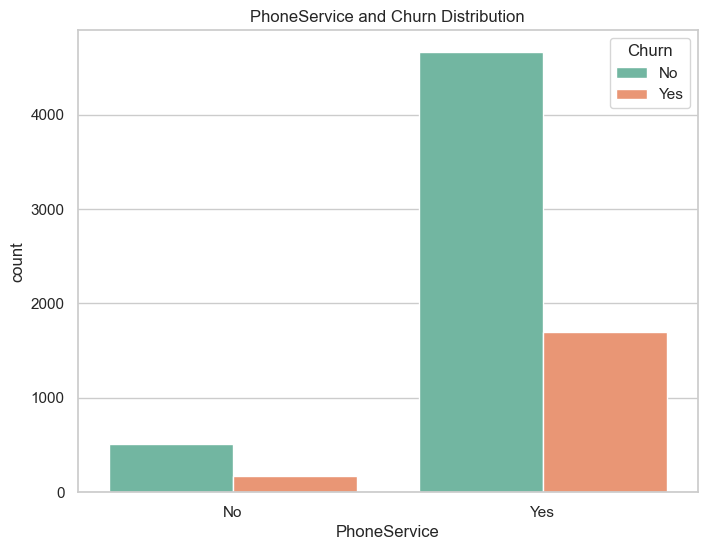

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', data=df, hue='Churn')
plt.title('PhoneService and Churn Distribution')
plt.show()

### This graph shows that the people who are using PhoneService are having a higher count of Churn as compare to people who are not using it.

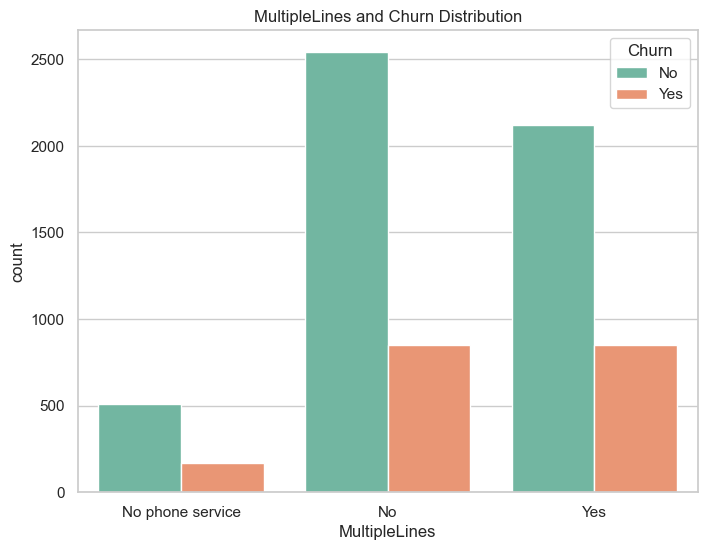

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleLines', data=df, hue='Churn')
plt.title('MultipleLines and Churn Distribution')
plt.show()

### This graph shows that the people who are using MultipleLines or not, or No Phone Service at all. Count of Churn is same whether the person is using MultipleLines or not.

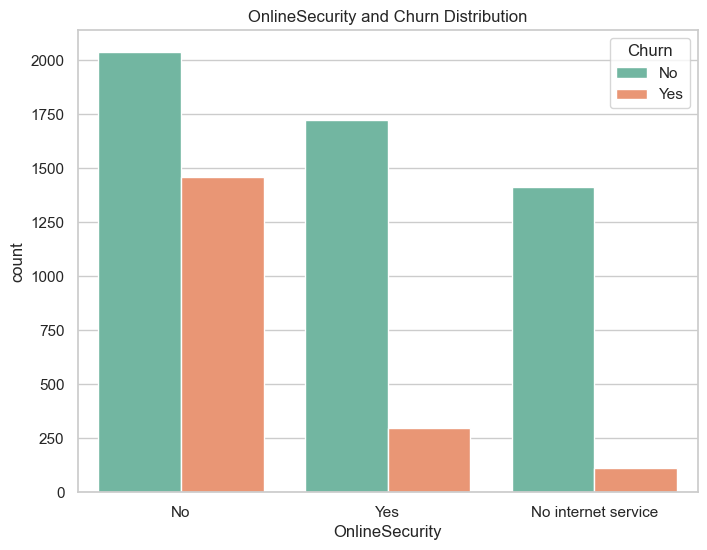

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineSecurity', data=df, hue='Churn')
plt.title('OnlineSecurity and Churn Distribution')
plt.show()

### This graph shows that the people who are using Online Security or not, or using No Internet Service at all. Count of Churn is highest when there is no Online Security.

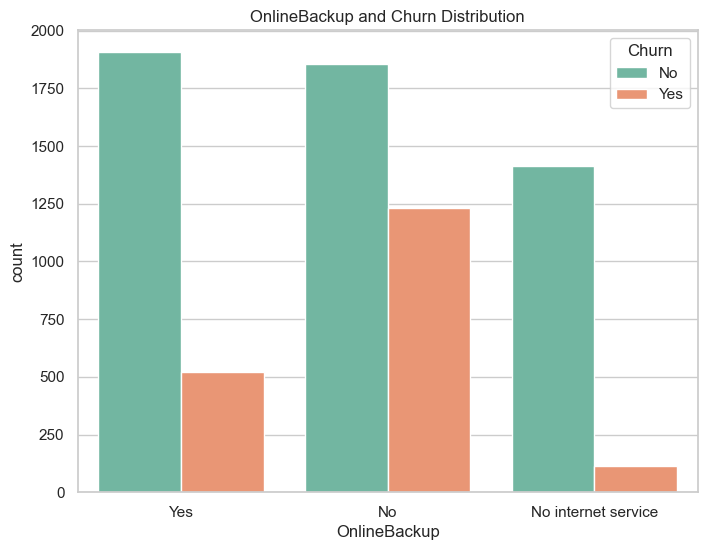

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineBackup', data=df, hue='Churn')
plt.title('OnlineBackup and Churn Distribution')
plt.show()

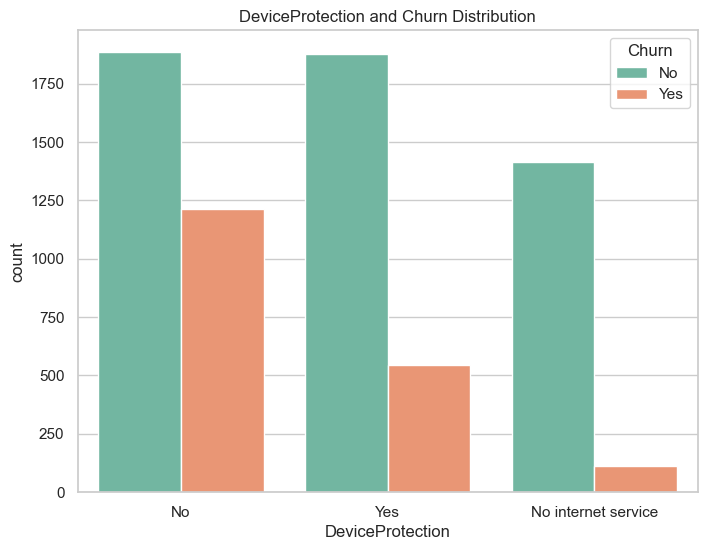

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceProtection', data=df, hue='Churn')
plt.title('DeviceProtection and Churn Distribution')
plt.show()

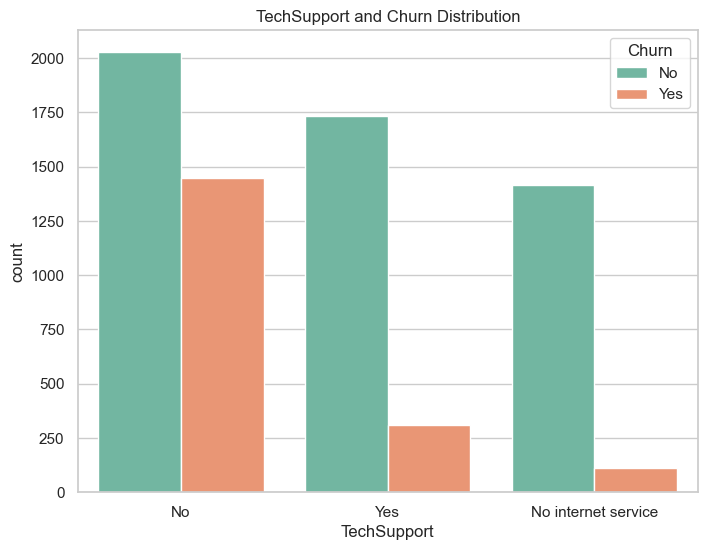

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TechSupport', data=df, hue='Churn')
plt.title('TechSupport and Churn Distribution')
plt.show()

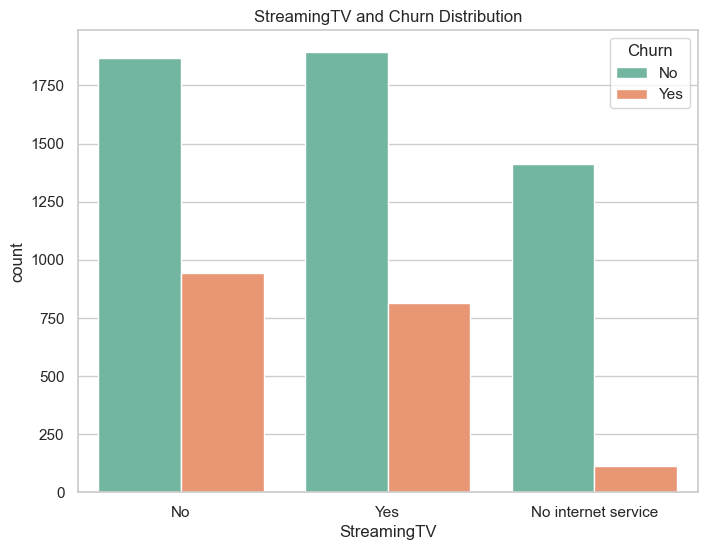

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingTV', data=df, hue='Churn')
plt.title('StreamingTV and Churn Distribution')
plt.show()

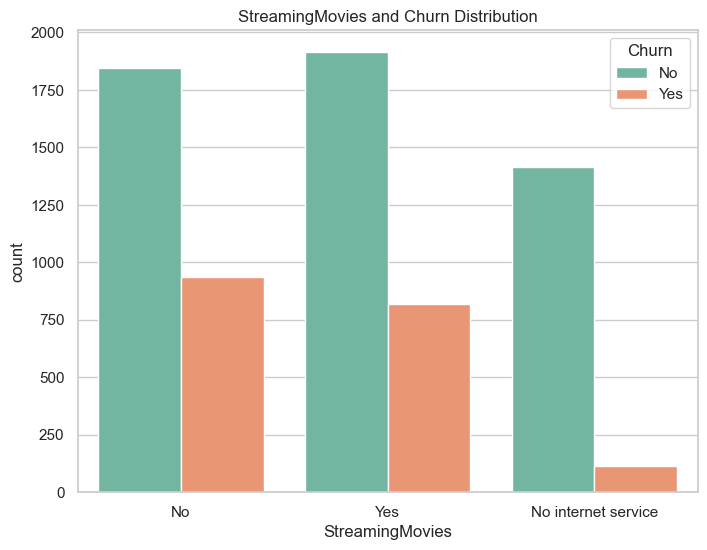

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingMovies', data=df, hue='Churn')
plt.title('StreamingMovies and Churn Distribution')
plt.show()

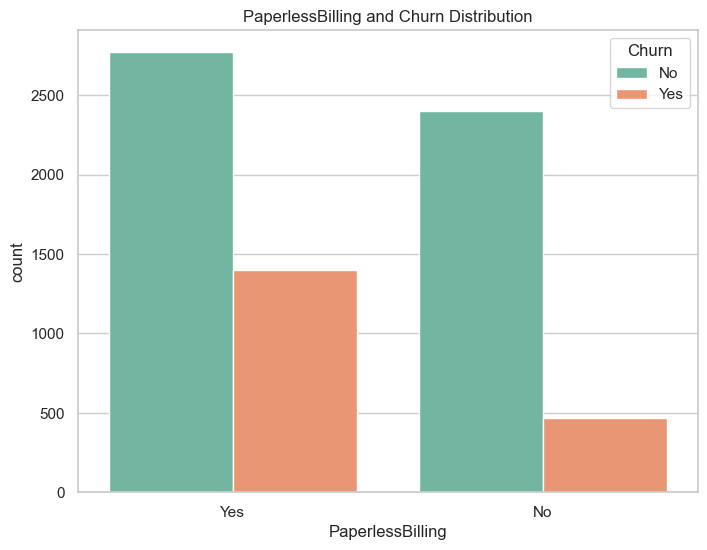

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', data=df, hue='Churn')
plt.title('PaperlessBilling and Churn Distribution')
plt.show()

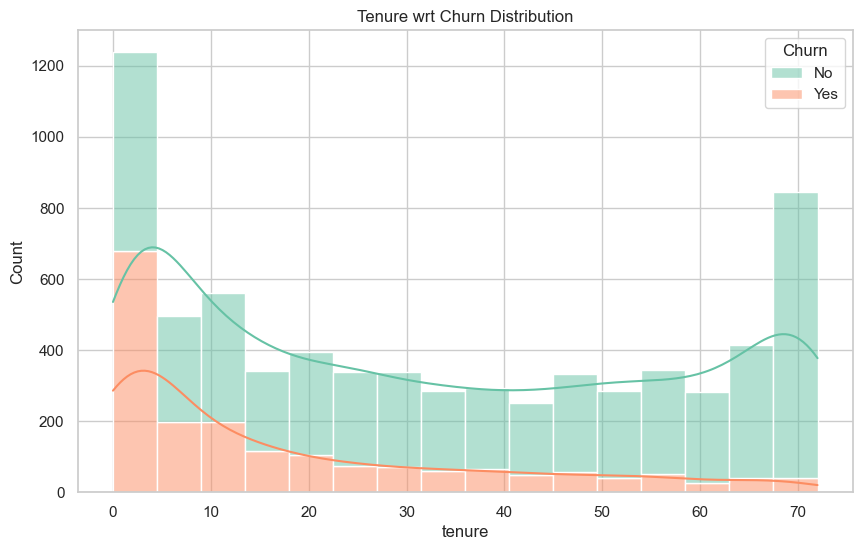

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', kde=True, hue='Churn', multiple='stack')
plt.title('Tenure wrt Churn Distribution')
plt.show()

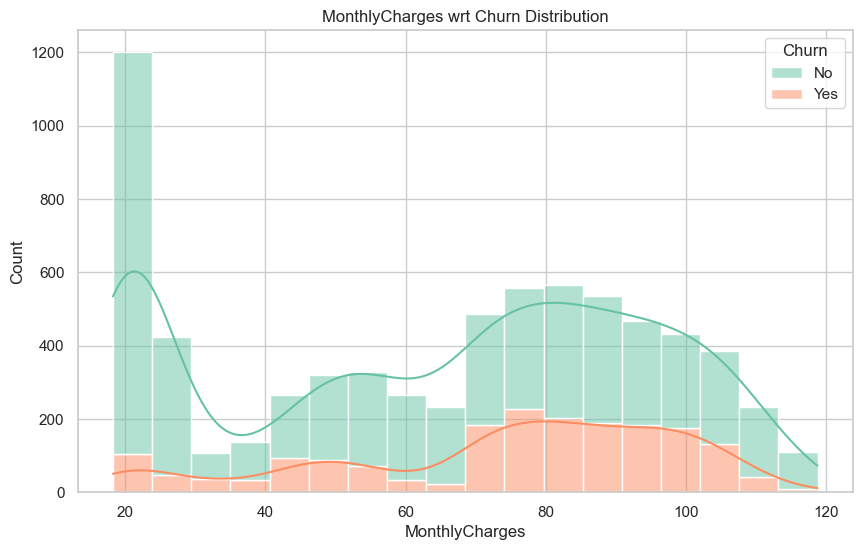

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', kde=True, hue='Churn', multiple='stack')
plt.title('MonthlyCharges wrt Churn Distribution')
plt.show()

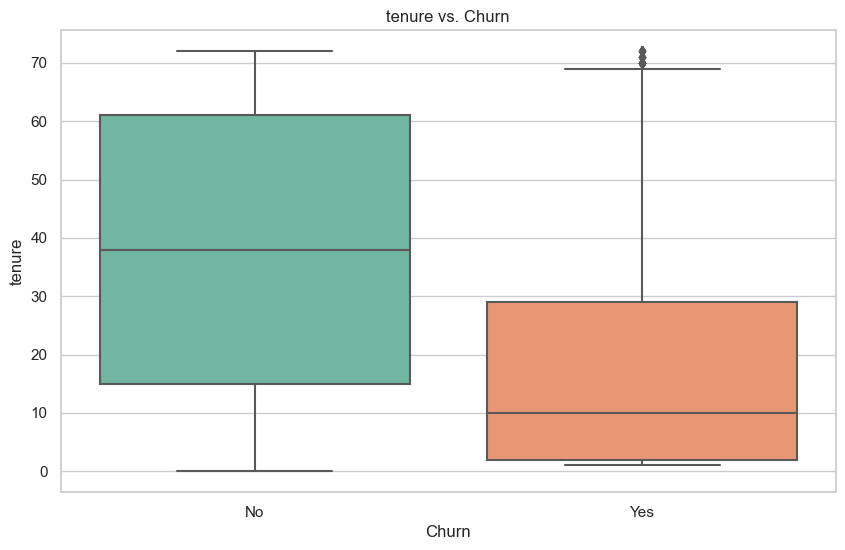

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('tenure vs. Churn')
plt.show()

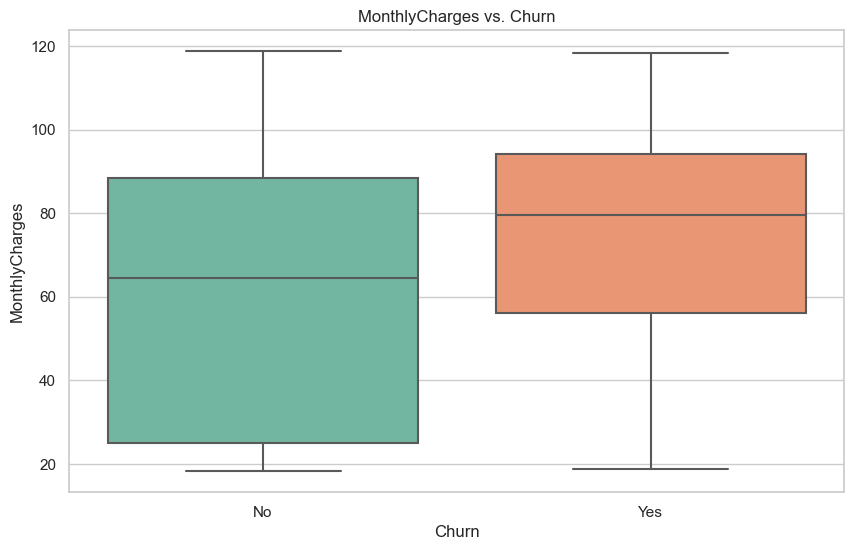

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs. Churn')
plt.show()

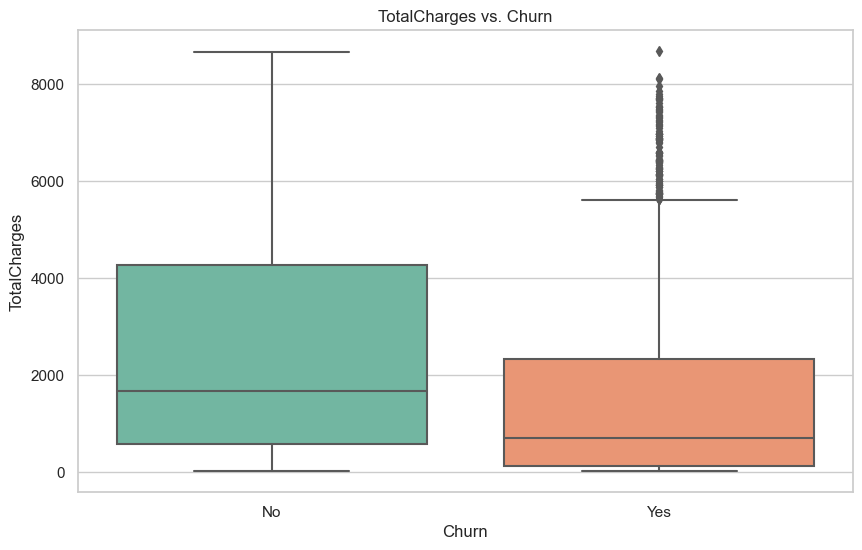

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('TotalCharges vs. Churn')
plt.show()


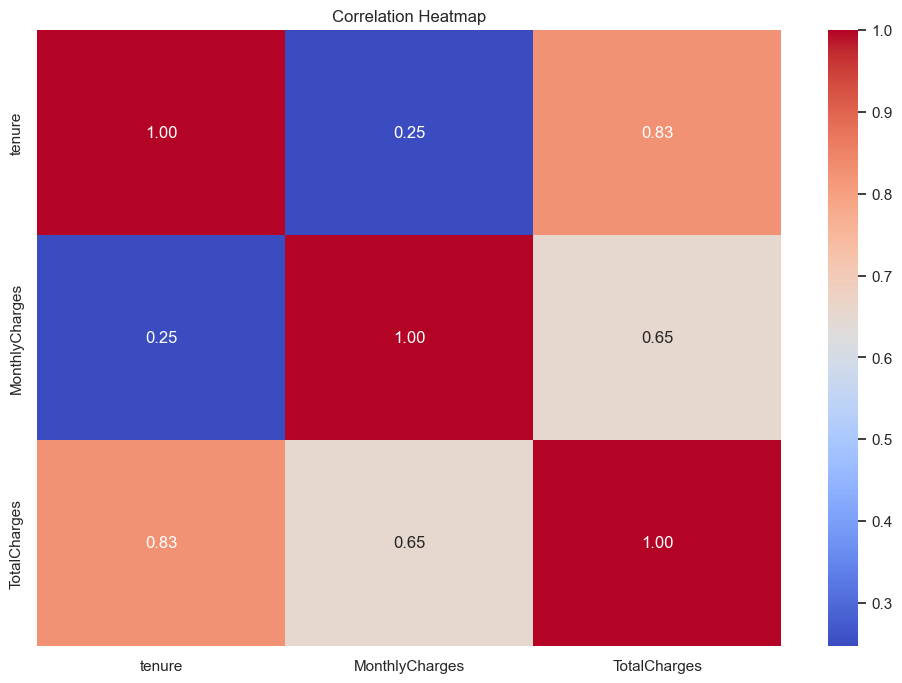

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [28]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [29]:
mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [30]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
gender_mapping = {'Female': 0, 'Male': 1}
df['gender'] = df['gender'].map(gender_mapping)

Partner_mapping = {'Yes': 0, 'No': 1}
df['Partner'] = df['Partner'].map(Partner_mapping)

Dependents_mapping = {'Yes': 0, 'No': 1}
df['Dependents'] = df['Dependents'].map(Dependents_mapping)

PhoneService_mapping = {'Yes': 0, 'No': 1}
df['PhoneService'] = df['PhoneService'].map(PhoneService_mapping)

MultipleLines_mapping = {'Yes': 0, 'No': 1, 'No phone service': 2}
df['MultipleLines'] = df['MultipleLines'].map(MultipleLines_mapping)

OnlineSecurity_mapping = {'Yes': 0, 'No': 1, 'No internet service': 2}
df['OnlineSecurity'] = df['OnlineSecurity'].map(OnlineSecurity_mapping)

OnlineBackup_mapping = {'Yes': 0, 'No': 1, 'No internet service': 2}
df['OnlineBackup'] = df['OnlineBackup'].map(OnlineBackup_mapping)

DeviceProtection_mapping = {'Yes': 0, 'No': 1, 'No internet service': 2}
df['DeviceProtection'] = df['DeviceProtection'].map(DeviceProtection_mapping)

TechSupport_mapping = {'Yes': 0, 'No': 1, 'No internet service': 2}
df['TechSupport'] = df['TechSupport'].map(TechSupport_mapping)

StreamingTV_mapping = {'Yes': 0, 'No': 1, 'No internet service': 2}
df['StreamingTV'] = df['StreamingTV'].map(StreamingTV_mapping)

StreamingMovies_mapping = {'Yes': 0, 'No': 1, 'No internet service': 2}
df['StreamingMovies'] = df['StreamingMovies'].map(StreamingMovies_mapping)

PaperlessBilling_mapping = {'Yes': 0, 'No': 1}
df['PaperlessBilling'] = df['PaperlessBilling'].map(PaperlessBilling_mapping)

In [33]:
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,1,2,DSL,1,0,1,1,1,1,Month-to-month,0,Electronic check,29.85,29.85,No
1,1,0,1,1,34,0,1,DSL,0,1,0,1,1,1,One year,1,Mailed check,56.95,1889.50,No
2,1,0,1,1,2,0,1,DSL,0,0,1,1,1,1,Month-to-month,0,Mailed check,53.85,108.15,Yes
3,1,0,1,1,45,1,2,DSL,0,1,0,0,1,1,One year,1,Bank transfer (automatic),42.30,1840.75,No
4,0,0,1,1,2,0,1,Fiber optic,1,1,1,1,1,1,Month-to-month,0,Electronic check,70.70,151.65,Yes
5,0,0,1,1,8,0,0,Fiber optic,1,1,0,1,0,0,Month-to-month,0,Electronic check,99.65,820.50,Yes
6,1,0,1,0,22,0,0,Fiber optic,1,0,1,1,0,1,Month-to-month,0,Credit card (automatic),89.10,1949.40,No
7,0,0,1,1,10,1,2,DSL,0,1,1,1,1,1,Month-to-month,1,Mailed check,29.75,301.90,No
8,0,0,0,1,28,0,0,Fiber optic,1,1,0,0,0,0,Month-to-month,0,Electronic check,104.80,3046.05,Yes
9,1,0,1,0,62,0,1,DSL,0,0,1,1,1,1,One year,1,Bank transfer (automatic),56.15,3487.95,No


In [34]:
df.shape

(7043, 20)

In [35]:
df_InternetService=pd.get_dummies(df.InternetService,drop_first=False)
df_Contract=pd.get_dummies(df.Contract,drop_first=False)
df_PaymentMethod=pd.get_dummies(df.PaymentMethod,drop_first=False)

In [36]:
df = pd.concat([df,df_InternetService,df_Contract,df_PaymentMethod],axis=1)

In [37]:
df.shape

(7043, 30)

In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,0,1,1,1,2,DSL,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,1,1,34,0,1,DSL,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,1,1,2,0,1,DSL,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,1,1,45,1,2,DSL,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,1,1,2,0,1,Fiber optic,1,1,...,0,1,0,1,0,0,0,0,1,0


In [39]:
df.drop(['InternetService', 'Contract', 'PaymentMethod'], axis = 1, inplace = True)

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,0,1,1,1,2,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,1,1,34,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,1,1,2,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,1,1,45,1,2,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,1,1,2,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [41]:
df.shape

(7043, 27)

In [42]:
col_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col_scale] = scaler.fit_transform(df[col_scale])

In [43]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,0,1,0.013889,1,2,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,1,1,0.472222,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,1,1,0.027778,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,1,1,0.625000,1,2,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,1,1,0.027778,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [44]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [45]:
print(X.shape)
print(y.shape)

(7043, 26)
(7043,)


In [46]:
ohe = OneHotEncoder()
y = y.values.reshape(-1, 1)  # or y.to_numpy().reshape(-1, 1)
y = ohe.fit_transform(y).toarray()
y[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [47]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.9)

In [48]:
print('Train size',X_train.shape)
print('Validation size',X_val.shape)
print('Test size',X_test.shape)

Train size (5634, 26)
Validation size (140, 26)
Test size (1269, 26)


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Configure the model- 1st Time

In [50]:
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation="softmax"))


### In this model, we have given the number of independent features to input dimension, for first hidden layer we have 100 neurons and activation function- relu, for second hidden layer we have 100 neurons and activation function is same as relu, in third hidden layer we have 50 neurons with relu being used as an activation function. In the output layer, there are 2 neurons with activation function- softmax

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 17952 (70.12 KB)
Trainable params: 17952 (70.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Validation Set

In [53]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
177/177 [==============================] - 3s 7ms/step - loss: 0.4472 - accuracy: 0.7819 - val_loss: 0.4576 - val_accuracy: 0.7786
Epoch 2/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4201 - accuracy: 0.7975 - val_loss: 0.4515 - val_accuracy: 0.7929
Epoch 3/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4132 - accuracy: 0.8003 - val_loss: 0.4574 - val_accuracy: 0.7929
Epoch 4/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4083 - accuracy: 0.8046 - val_loss: 0.4520 - val_accuracy: 0.7786
Epoch 5/100
177/177 [==============================] - 1s 5ms/step - loss: 0.4036 - accuracy: 0.8033 - val_loss: 0.4382 - val_accuracy: 0.8071
Epoch 6/100
177/177 [==============================] - 1s 8ms/step - loss: 0.3992 - accuracy: 0.8090 - val_loss: 0.4371 - val_accuracy: 0.7857
Epoch 7/100
177/177 [==============================] - 1s 7ms/step - loss: 0.3930 - accuracy: 0.8111 - val_loss: 0.4575 - val_accuracy: 0.7643

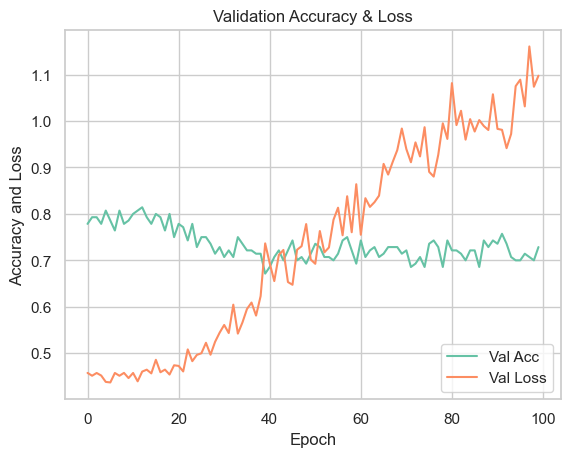

In [54]:
plt.plot(history.history['val_accuracy'])  # Add this line for validation accuracy
plt.plot(history.history['val_loss'])      # Add this line for validation loss
plt.title('Validation Accuracy & Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Val Acc', 'Val Loss'], loc='lower right')
plt.show()

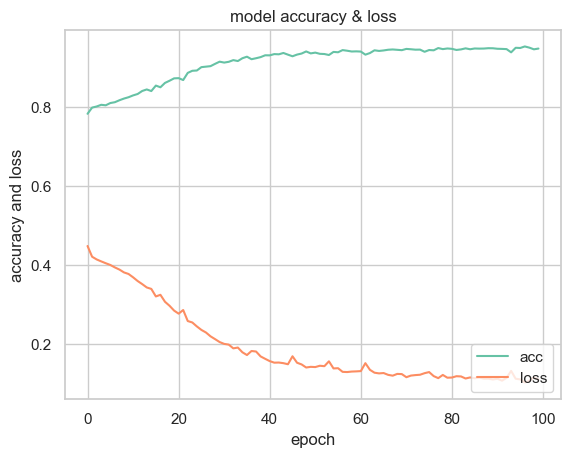

In [55]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [56]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(score[1], 1 - score[1]))

Accuracy on test data: 0.7446808218955994% 
 Error on test data: 0.25531917810440063


In [57]:
y_pred = model.predict(X_test)


pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

40/40 [==============================] - 1s 4ms/step


In [58]:
print(confusion_matrix(pred,test))

[[810 187]
 [137 135]]


In [59]:
rep = classification_report(test, pred)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       947
           1       0.50      0.42      0.45       322

    accuracy                           0.74      1269
   macro avg       0.65      0.64      0.64      1269
weighted avg       0.73      0.74      0.74      1269



# Dropout Layer

In [60]:
model = Sequential()

#Hidden Layer-1
model.add(Dense(100,activation='relu',input_dim=X.shape[1],kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer-2
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden layer 3
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.2, noise_shape=None, seed = None))

#Output layer
model.add(Dense(2,activation='softmax'))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               2700      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                

In [62]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
history_Dropout = model.fit(X_train,y_train,epochs=100,batch_size=30,verbose=1, validation_data=(X_test,y_test),)

Epoch 1/100
188/188 [==============================] - 7s 7ms/step - loss: 1.1248 - accuracy: 0.7559 - val_loss: 0.6553 - val_accuracy: 0.8014
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.5640 - accuracy: 0.7902 - val_loss: 0.4835 - val_accuracy: 0.8117
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4836 - accuracy: 0.7938 - val_loss: 0.4535 - val_accuracy: 0.7998
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4610 - accuracy: 0.7909 - val_loss: 0.4403 - val_accuracy: 0.8125
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4554 - accuracy: 0.7955 - val_loss: 0.4415 - val_accuracy: 0.8054
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4494 - accuracy: 0.7939 - val_loss: 0.4409 - val_accuracy: 0.7983
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4494 - accuracy: 0.7934 - val_loss: 0.4258 - val_accuracy: 0.8101

In [64]:
print('Training Accuracy : ' , np.mean(history_Dropout.history["accuracy"]))
print('Validation Accuracy : ' , np.mean(history_Dropout.history["val_accuracy"]))

Training Accuracy :  0.7996414631605149
Validation Accuracy :  0.8062805360555649


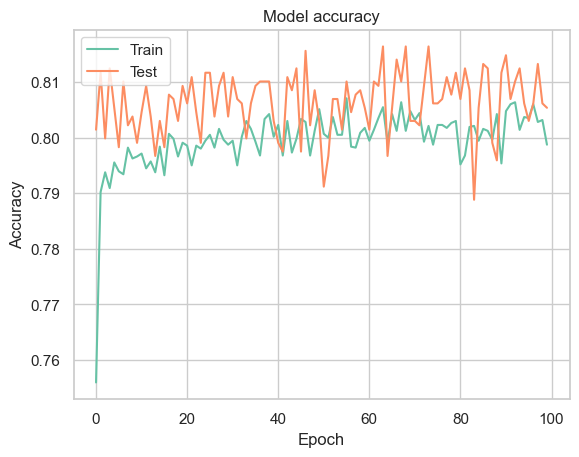

In [65]:
plt.plot(history_Dropout.history['accuracy'])
plt.plot(history_Dropout.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [66]:
print('Training Loss : ' , np.mean(history_Dropout.history["loss"]))
print('Validation Loss : ' , np.mean(history_Dropout.history["val_loss"]))

Training Loss :  0.4469030398130417
Validation Loss :  0.43209026783704757


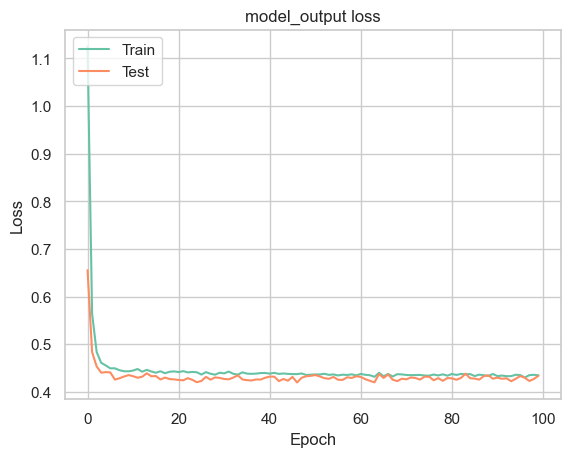

In [67]:
plt.plot(history_Dropout.history['loss'])
plt.plot(history_Dropout.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

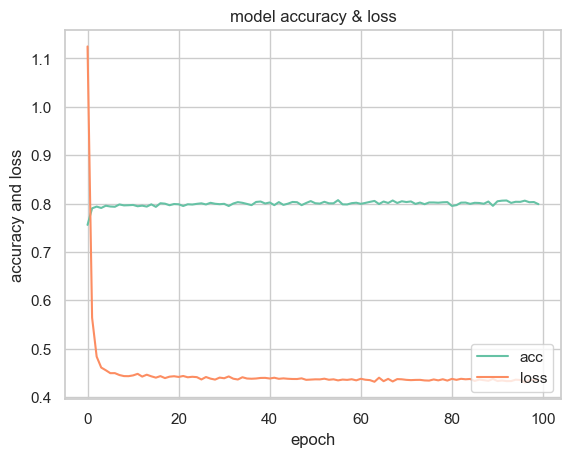

In [68]:
plt.plot(history_Dropout.history["accuracy"])
plt.plot(history_Dropout.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [69]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(score[1], 1 - score[1]))

Accuracy on test data: 0.8053585290908813% 
 Error on test data: 0.19464147090911865


In [70]:
y_pred = model.predict(X_test)


pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

40/40 [==============================] - 0s 4ms/step


In [71]:
print(confusion_matrix(pred,test))

[[836 136]
 [111 186]]


In [72]:
rep = classification_report(test, pred)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       947
           1       0.63      0.58      0.60       322

    accuracy                           0.81      1269
   macro avg       0.74      0.73      0.74      1269
weighted avg       0.80      0.81      0.80      1269



# EarlyStopping Layer

In [73]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [74]:
history_EarlyStopping = model.fit(X_train,y_train,validation_data=(X_test,y_test), callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
177/177 - 1s - loss: 0.4360 - accuracy: 0.8044 - val_loss: 0.4358 - val_accuracy: 0.8014 - 1s/epoch - 6ms/step
Epoch 2/500
177/177 - 1s - loss: 0.4341 - accuracy: 0.8012 - val_loss: 0.4272 - val_accuracy: 0.8101 - 911ms/epoch - 5ms/step
Epoch 3/500
177/177 - 1s - loss: 0.4347 - accuracy: 0.8007 - val_loss: 0.4317 - val_accuracy: 0.7975 - 896ms/epoch - 5ms/step
Epoch 4/500
177/177 - 1s - loss: 0.4354 - accuracy: 0.7993 - val_loss: 0.4329 - val_accuracy: 0.8195 - 1s/epoch - 7ms/step
Epoch 5/500
177/177 - 1s - loss: 0.4375 - accuracy: 0.8009 - val_loss: 0.4306 - val_accuracy: 0.8085 - 979ms/epoch - 6ms/step
Epoch 6/500
177/177 - 1s - loss: 0.4338 - accuracy: 0.8012 - val_loss: 0.4261 - val_accuracy: 0.8132 - 974ms/epoch - 6ms/step
Epoch 7/500
177/177 - 1s - loss: 0.4328 - accuracy: 0.8056 - val_loss: 0.4314 - val_accuracy: 0.8014 - 923ms/epoch - 5ms/step
Epoch 8/500
177/177 - 1s - loss: 0.4378 - accuracy: 0.8019 - val_loss: 0.4297 - val_accuracy: 0.8140 - 993ms/epoch - 6ms/ste

In [75]:
print('Training Accuracy : ' , np.mean(history_EarlyStopping.history["accuracy"]))
print('Validation Accuracy : ' , np.mean(history_EarlyStopping.history["val_accuracy"]))

Training Accuracy :  0.8020722456276417
Validation Accuracy :  0.8060480691492558


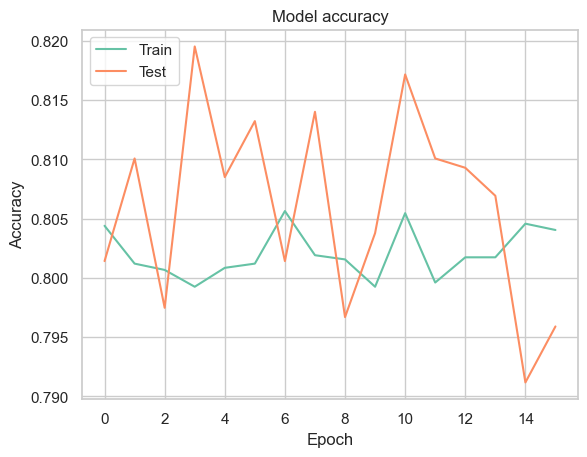

In [76]:
plt.plot(history_EarlyStopping.history['accuracy'])
plt.plot(history_EarlyStopping.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [77]:
print('Training Loss : ' , np.mean(history_EarlyStopping.history["loss"]))
print('Validation Loss : ' , np.mean(history_EarlyStopping.history["val_loss"]))

Training Loss :  0.4352304767817259
Validation Loss :  0.4311310052871704


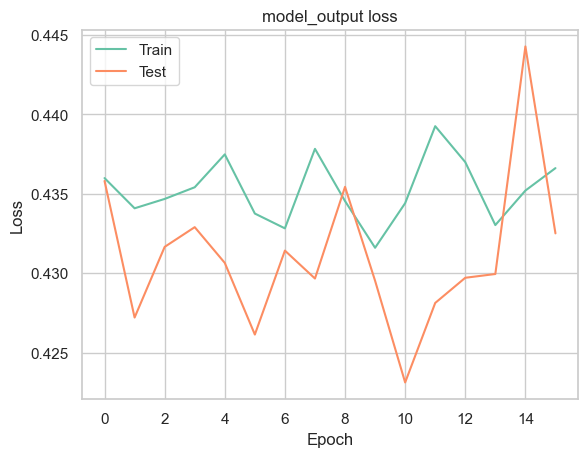

In [78]:
plt.plot(history_EarlyStopping.history['loss'])
plt.plot(history_EarlyStopping.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

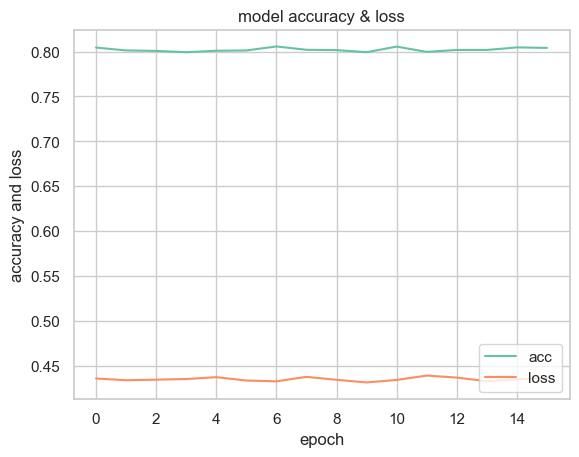

In [79]:
plt.plot(history_EarlyStopping.history["accuracy"])
plt.plot(history_EarlyStopping.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [80]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(score[1], 1 - score[1]))

Accuracy on test data: 0.8171789050102234 
 Error on test data: 0.1828210949897766


In [81]:
y_pred = model.predict(X_test)


pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

40/40 [==============================] - 0s 4ms/step


In [82]:
print(confusion_matrix(pred,test))

[[853 138]
 [ 94 184]]


In [83]:
rep = classification_report(test, pred)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       947
           1       0.66      0.57      0.61       322

    accuracy                           0.82      1269
   macro avg       0.76      0.74      0.75      1269
weighted avg       0.81      0.82      0.81      1269



# Reconfigure the Model

In [84]:
model = Sequential()
model.add(Dense(200, input_dim=X.shape[1], activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation="softmax"))

### In this model, we have given the number of independent features to input dimension, for first hidden layer we have 200 neurons and activation function- relu, for second hidden layer we have 150 neurons and activation function is same as relu, in third hidden layer we have 100 neurons with relu being used as an activation function, and in 4th hidden layer we have 50 neurons with activation function-relu. In the output layer, there are 2 neurons with activation function- softmax

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               5400      
                                                                 
 dense_9 (Dense)             (None, 150)               30150     
                                                                 
 dense_10 (Dense)            (None, 100)               15100     
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 2)                 102       
                                                                 
Total params: 55802 (217.98 KB)
Trainable params: 55802 (217.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
177/177 [==============================] - 5s 10ms/step - loss: 0.4469 - accuracy: 0.7849 - val_loss: 0.4764 - val_accuracy: 0.7357
Epoch 2/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4196 - accuracy: 0.7984 - val_loss: 0.5051 - val_accuracy: 0.7357
Epoch 3/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4128 - accuracy: 0.8040 - val_loss: 0.4790 - val_accuracy: 0.7429
Epoch 4/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4082 - accuracy: 0.8065 - val_loss: 0.4524 - val_accuracy: 0.7571
Epoch 5/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4051 - accuracy: 0.8113 - val_loss: 0.4790 - val_accuracy: 0.7429
Epoch 6/100
177/177 [==============================] - 1s 6ms/step - loss: 0.3988 - accuracy: 0.8113 - val_loss: 0.4748 - val_accuracy: 0.7429
Epoch 7/100
177/177 [==============================] - 1s 6ms/step - loss: 0.3913 - accuracy: 0.8138 - val_loss: 0.4837 - val_accuracy: 0.735

In [88]:
print('Training Accuracy : ' , np.mean(history.history["accuracy"]))
print('Validation Accuracy : ' , np.mean(history.history["val_accuracy"]))

Training Accuracy :  0.9204668092727661
Validation Accuracy :  0.7141428524255753


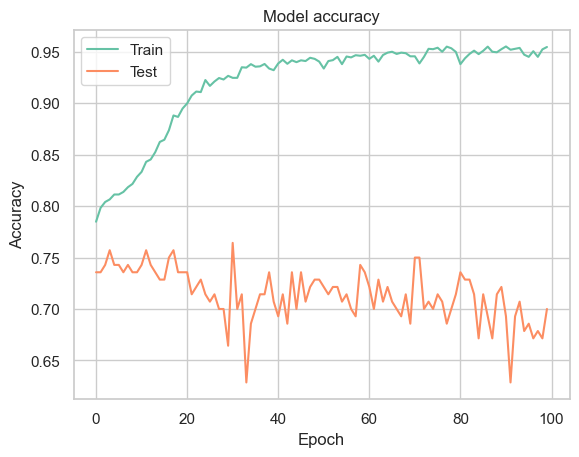

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [90]:
print('Training Loss : ' , np.mean(history.history["loss"]))
print('Validation Loss : ' , np.mean(history.history["val_loss"]))

Training Loss :  0.16705690555274486
Validation Loss :  1.2627489086985588


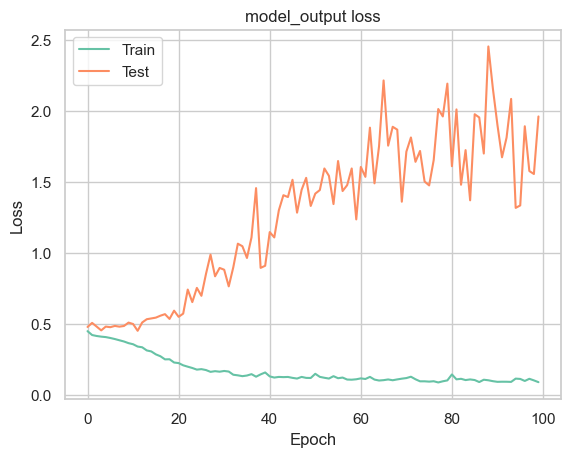

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

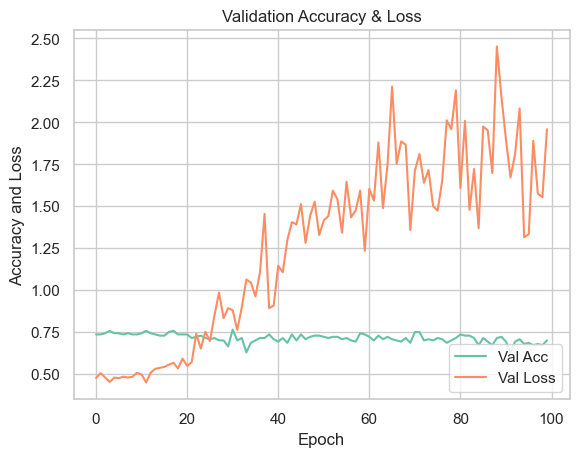

In [92]:
plt.plot(history.history['val_accuracy'])  # Add this line for validation accuracy
plt.plot(history.history['val_loss'])      # Add this line for validation loss
plt.title('Validation Accuracy & Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Val Acc', 'Val Loss'], loc='lower right')
plt.show()

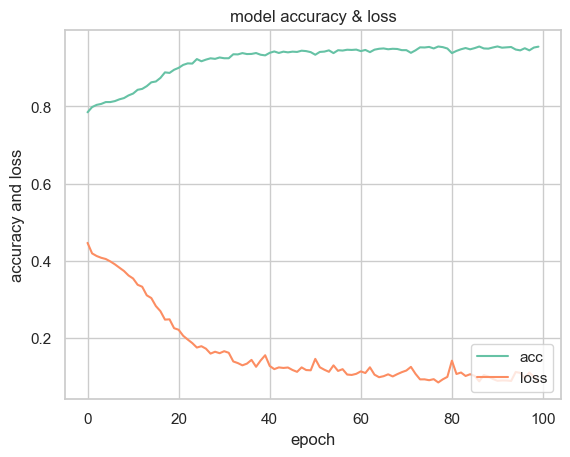

In [93]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [94]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(score[1], 1 - score[1]))

Accuracy on test data: 0.7628053426742554% 
 Error on test data: 0.23719465732574463


In [95]:
y_pred = model.predict(X_test)


pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

40/40 [==============================] - 0s 4ms/step


In [96]:
print(confusion_matrix(pred,test))

[[811 165]
 [136 157]]


In [97]:
rep = classification_report(test, pred)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       947
           1       0.54      0.49      0.51       322

    accuracy                           0.76      1269
   macro avg       0.68      0.67      0.68      1269
weighted avg       0.76      0.76      0.76      1269



# Dropout Layer

In [98]:
model = Sequential()

#Hidden Layer-1
model.add(Dense(100,activation='relu',input_dim=X.shape[1],kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer-2
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden layer 3
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.2, noise_shape=None, seed = None))

#Output layer
model.add(Dense(2,activation='softmax'))

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               2700      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 2)                

In [100]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
history_Dropout = model.fit(X_train,y_train,epochs=100,batch_size=30,verbose=1, validation_data=(X_test,y_test),)

Epoch 1/100
188/188 [==============================] - 4s 10ms/step - loss: 1.1469 - accuracy: 0.7614 - val_loss: 0.6740 - val_accuracy: 0.8022
Epoch 2/100
188/188 [==============================] - 1s 7ms/step - loss: 0.5771 - accuracy: 0.7913 - val_loss: 0.4891 - val_accuracy: 0.8109
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4832 - accuracy: 0.7955 - val_loss: 0.4559 - val_accuracy: 0.8156
Epoch 4/100
188/188 [==============================] - 1s 7ms/step - loss: 0.4619 - accuracy: 0.7959 - val_loss: 0.4445 - val_accuracy: 0.8109
Epoch 5/100
188/188 [==============================] - 1s 7ms/step - loss: 0.4545 - accuracy: 0.7941 - val_loss: 0.4454 - val_accuracy: 0.7943
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4500 - accuracy: 0.7993 - val_loss: 0.4336 - val_accuracy: 0.8038
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4482 - accuracy: 0.7943 - val_loss: 0.4417 - val_accuracy: 0.800

In [102]:
print('Training Accuracy : ' , np.mean(history_Dropout.history["accuracy"]))
print('Validation Accuracy : ' , np.mean(history_Dropout.history["val_accuracy"]))

Training Accuracy :  0.799151577949524
Validation Accuracy :  0.8049093747138977


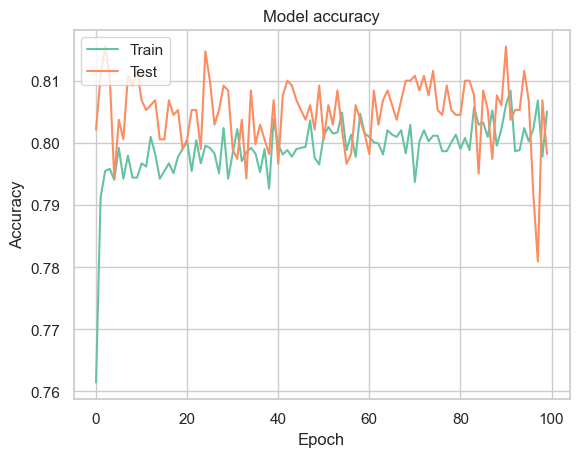

In [103]:
plt.plot(history_Dropout.history['accuracy'])
plt.plot(history_Dropout.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [104]:
print('Training Loss : ' , np.mean(history_Dropout.history["loss"]))
print('Validation Loss : ' , np.mean(history_Dropout.history["val_loss"]))

Training Loss :  0.4474519270658493
Validation Loss :  0.43345397800207136


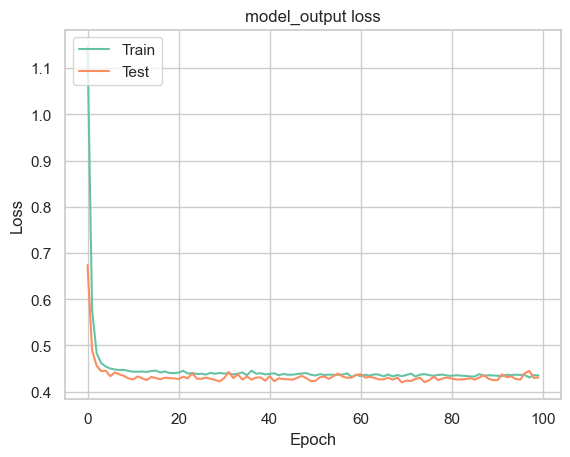

In [105]:
plt.plot(history_Dropout.history['loss'])
plt.plot(history_Dropout.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

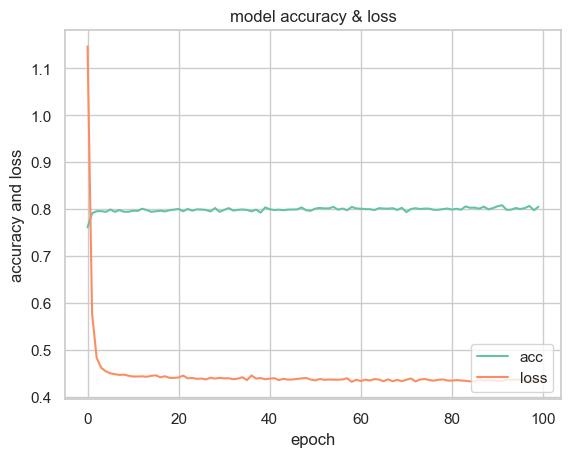

In [106]:
plt.plot(history_Dropout.history["accuracy"])
plt.plot(history_Dropout.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [107]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(score[1], 1 - score[1]))

Accuracy on test data: 0.7982663512229919% 
 Error on test data: 0.20173364877700806


In [108]:
y_pred = model.predict(X_test)


pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

40/40 [==============================] - 0s 3ms/step


In [109]:
print(confusion_matrix(pred,test))

[[821 130]
 [126 192]]


In [110]:
rep = classification_report(test, pred)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       947
           1       0.60      0.60      0.60       322

    accuracy                           0.80      1269
   macro avg       0.73      0.73      0.73      1269
weighted avg       0.80      0.80      0.80      1269



# EarlyStopping

In [111]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [112]:
history_EarlyStopping = model.fit(X_train,y_train,validation_data=(X_test,y_test), callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
177/177 - 1s - loss: 0.4359 - accuracy: 0.7993 - val_loss: 0.4319 - val_accuracy: 0.8046 - 1s/epoch - 6ms/step
Epoch 2/500
177/177 - 1s - loss: 0.4338 - accuracy: 0.8032 - val_loss: 0.4305 - val_accuracy: 0.7975 - 1s/epoch - 6ms/step
Epoch 3/500
177/177 - 1s - loss: 0.4299 - accuracy: 0.8056 - val_loss: 0.4299 - val_accuracy: 0.8046 - 1s/epoch - 7ms/step
Epoch 4/500
177/177 - 1s - loss: 0.4307 - accuracy: 0.8016 - val_loss: 0.4346 - val_accuracy: 0.8038 - 1s/epoch - 7ms/step
Epoch 5/500
177/177 - 1s - loss: 0.4359 - accuracy: 0.7985 - val_loss: 0.4274 - val_accuracy: 0.8061 - 1s/epoch - 6ms/step
Epoch 6/500
177/177 - 1s - loss: 0.4324 - accuracy: 0.8035 - val_loss: 0.4297 - val_accuracy: 0.8077 - 862ms/epoch - 5ms/step
Epoch 7/500
177/177 - 1s - loss: 0.4358 - accuracy: 0.8017 - val_loss: 0.4314 - val_accuracy: 0.8061 - 861ms/epoch - 5ms/step
Epoch 8/500
177/177 - 1s - loss: 0.4361 - accuracy: 0.8051 - val_loss: 0.4285 - val_accuracy: 0.8132 - 881ms/epoch - 5ms/step
Epoch 9

In [113]:
print('Training Accuracy : ' , np.mean(history_EarlyStopping.history["accuracy"]))
print('Validation Accuracy : ' , np.mean(history_EarlyStopping.history["val_accuracy"]))

Training Accuracy :  0.802224584420522
Validation Accuracy :  0.8029419501622518


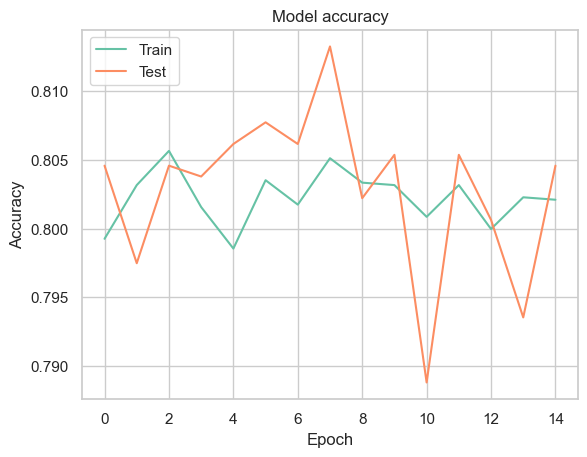

In [114]:
plt.plot(history_EarlyStopping.history['accuracy'])
plt.plot(history_EarlyStopping.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [115]:
print('Training Loss : ' , np.mean(history_EarlyStopping.history["loss"]))
print('Validation Loss : ' , np.mean(history_EarlyStopping.history["val_loss"]))

Training Loss :  0.4335075398286184
Validation Loss :  0.4307177662849426


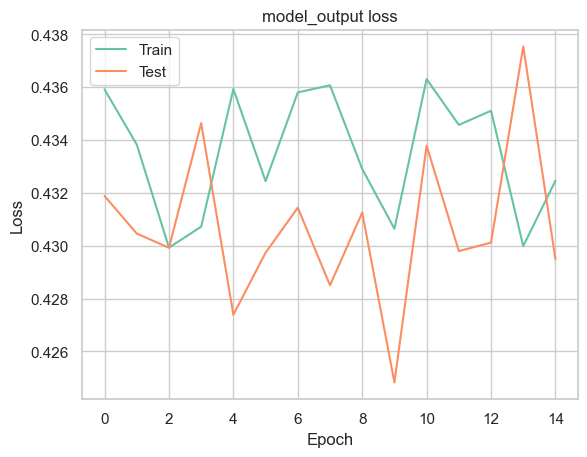

In [116]:
plt.plot(history_EarlyStopping.history['loss'])
plt.plot(history_EarlyStopping.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

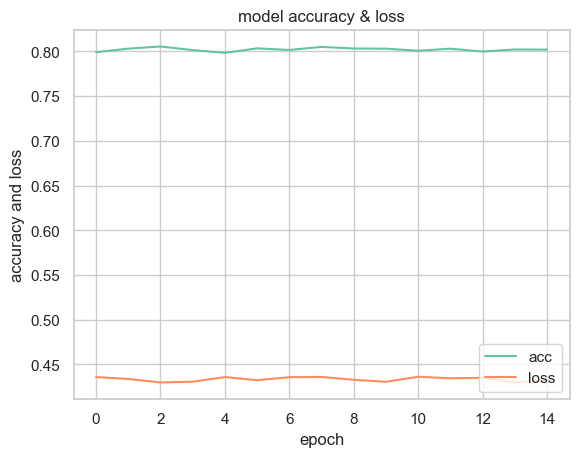

In [117]:
plt.plot(history_EarlyStopping.history["accuracy"])
plt.plot(history_EarlyStopping.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [118]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(score[1], 1 - score[1]))

Accuracy on test data: 0.8053585290908813 
 Error on test data: 0.19464147090911865


In [119]:
y_pred = model.predict(X_test)


pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

40/40 [==============================] - 0s 3ms/step


In [120]:
print(confusion_matrix(pred,test))

[[845 145]
 [102 177]]


In [121]:
rep = classification_report(test, pred)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       947
           1       0.63      0.55      0.59       322

    accuracy                           0.81      1269
   macro avg       0.74      0.72      0.73      1269
weighted avg       0.80      0.81      0.80      1269

